In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from textwrap import wrap
import matplotlib.ticker as mtick
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import r2_score
from matplotlib.patches import ConnectionPatch
from sklearn.datasets import load_boston

In [2]:
df = pd.read_csv("monkeypox.csv")

#View the data
df.head()

,iso_code,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,AND,Andorra,2022-07-25,1.0,NaN,1.0,12.653,12.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AND,Andorra,2022-07-26,2.0,NaN,3.0,25.306,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AND,Andorra,2022-07-27,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,Andorra,2022-07-28,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,2022-07-29,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         4953 non-null   object 
 1   location                         4953 non-null   object 
 2   date                             4953 non-null   object 
 3   new_cases                        4952 non-null   float64
 4   new_cases_smoothed               4455 non-null   float64
 5   total_cases                      4952 non-null   float64
 6   new_cases_per_million            4952 non-null   float64
 7   total_cases_per_million          4952 non-null   float64
 8   new_cases_smoothed_per_million   4455 non-null   float64
 9   new_deaths                       158 non-null    float64
 10  new_deaths_smoothed              137 non-null    float64
 11  total_deaths                     158 non-null    float64
 12  new_deaths_per_milli

In [4]:
df.describe()

,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,4952.000000,4455.000000,4952.000000,4952.000000,4952.000000,4455.000000,158.000000,137.000000,158.000000,158.000000,158.00000,137.000000
mean,19.477787,20.046148,577.192649,0.274735,7.951618,0.241667,0.164557,0.099197,3.018987,0.001772,0.00531,0.000066
std,114.221308,92.053273,3093.814233,1.461836,15.765790,0.452783,0.420203,0.195366,3.407507,0.009260,0.01018,0.000249
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.266000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
50%,0.000000,0.710000,13.000000,0.000000,1.228000,0.055000,0.000000,0.000000,1.000000,0.000000,0.00150,0.000000
75%,1.000000,5.000000,101.000000,0.017000,7.347750,0.300500,0.000000,0.140000,3.000000,0.000000,0.00500,0.000000
max,2063.000000,1016.430000,48227.000000,54.517000,136.016000,7.905000,2.000000,1.000000,13.000000,0.089000,0.08900,0.001000


In [5]:
#How many rows and attributes? 
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  4953
Number of Columns:  15


In [6]:
#checking missing values
df.isna().sum()

iso_code                              0
location                              0
date                                  0
new_cases                             1
new_cases_smoothed                  498
total_cases                           1
new_cases_per_million                 1
total_cases_per_million               1
new_cases_smoothed_per_million      498
new_deaths                         4795
new_deaths_smoothed                4816
total_deaths                       4795
new_deaths_per_million             4795
total_deaths_per_million           4795
new_deaths_smoothed_per_million    4816
dtype: int64

Text(0, 0.5, 'Count')

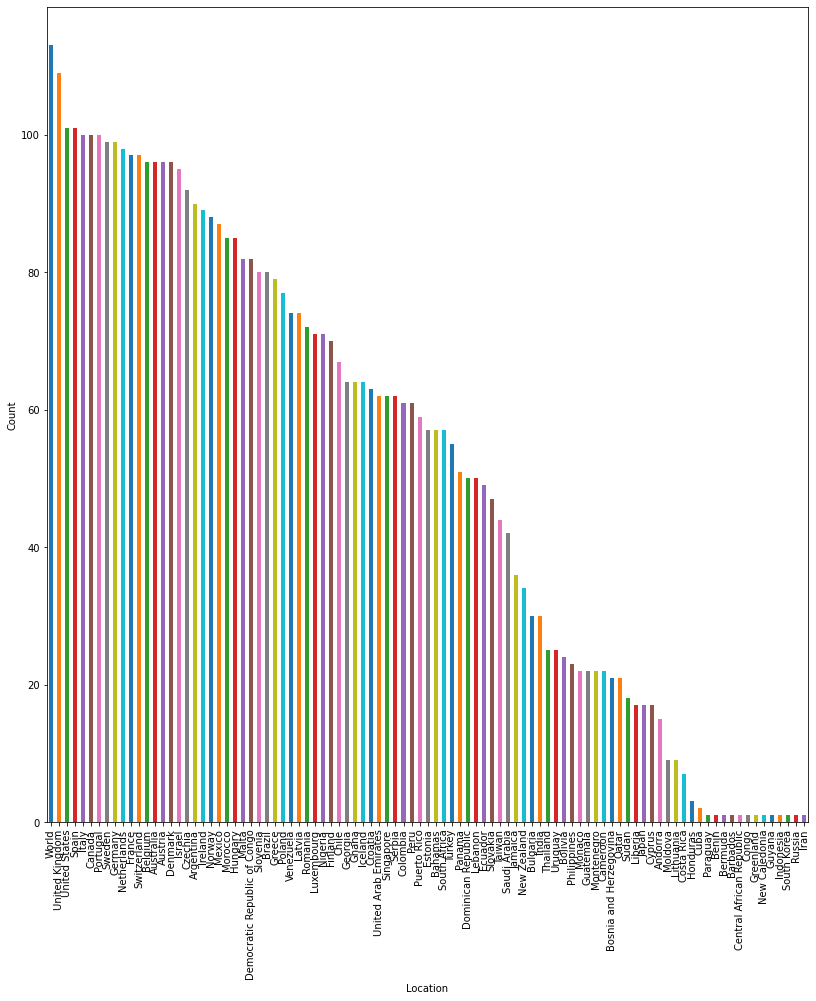

In [7]:
acumulated_df = df.groupby(['date','location'])['new_cases'].agg('sum').reset_index()

plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
df['location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.xlabel("Location")
plt.ylabel("Count")

In [8]:
print(df["location"].unique())

['Andorra' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Benin' 'Bulgaria' 'Bahamas' 'Bosnia and Herzegovina' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Central African Republic' 'Canada'
 'Switzerland' 'Chile' 'Cameroon' 'Democratic Republic of Congo' 'Congo'
 'Colombia' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Spain' 'Estonia' 'Finland' 'France'
 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
 'Guyana' 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland'
 'Iran' 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'South Korea'
 'Lebanon' 'Liberia' 'Lithuania' 'Luxembourg' 'Latvia' 'Morocco' 'Monaco'
 'Moldova' 'Mexico' 'Malta' 'Montenegro' 'New Caledonia' 'Nigeria'
 'Netherlands' 'Norway' 'New Zealand' 'Panama' 'Peru' 'Philippines'
 'Poland' 'Puerto Rico' 'Portugal' 'Paraguay' 'Qatar' 'Romania' 'Russia'
 'Saudi Arabia' 'Sudan' 'Singapore' 'Serbia' 'Slovakia' 'Slovenia'
 'Sweden' 'Thailand' 

As we can see, there's an unsual entry in the location dataframe, named "World", which is an aggregate of all the countries around the world, so we exclude it while visiualising data on basis of location

In [9]:
print("Total no.of countires listed in the dataset given are :- ",df["location"].unique().shape[0]- 1)

Total no.of countires listed in the dataset given are :-  94


In [10]:
df_loc = df[df["location"] != "World"]
df_loc.describe()

,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,4839.000000,4348.000000,4839.000000,4839.000000,4839.000000,4348.000000,73.000000,58.000000,73.000000,73.000000,73.000000,58.000000
mean,9.966315,10.155370,289.758215,0.279889,8.099259,0.246300,0.178082,0.039828,1.630137,0.003836,0.011027,0.000155
std,57.948944,39.804765,1103.637553,1.478383,15.916376,0.457292,0.419738,0.096962,0.950246,0.013378,0.012803,0.000365
min,0.000000,0.000000,1.000000,0.000000,0.001000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.266000,0.000000,0.000000,0.000000,1.000000,0.000000,0.005000,0.000000
50%,0.000000,0.570000,12.000000,0.000000,1.236000,0.055000,0.000000,0.000000,1.000000,0.000000,0.005000,0.000000
75%,1.000000,4.000000,90.000000,0.012000,7.594000,0.314000,0.000000,0.000000,3.000000,0.000000,0.014000,0.000000
max,1411.000000,537.430000,17336.000000,54.517000,136.016000,7.905000,2.000000,0.290000,4.000000,0.089000,0.089000,0.001000


                                 new_cases  new_cases_smoothed  total_cases  \
new_cases                         1.000000            0.810566     0.767176   
new_cases_smoothed                0.810566            1.000000     0.953759   
total_cases                       0.767176            0.953759     1.000000   
new_cases_per_million             0.142468            0.050267     0.034714   
total_cases_per_million           0.089221            0.103766     0.159752   
new_cases_smoothed_per_million    0.113074            0.138760     0.119207   
new_deaths                        0.098851            0.166714     0.132821   
new_deaths_smoothed               0.377645            0.542538     0.479859   
total_deaths                      0.597703            0.849093     0.926743   
new_deaths_per_million           -0.091471           -0.134739    -0.114514   
total_deaths_per_million         -0.302732           -0.383945    -0.309951   
new_deaths_smoothed_per_million  -0.172742          

<AxesSubplot:>

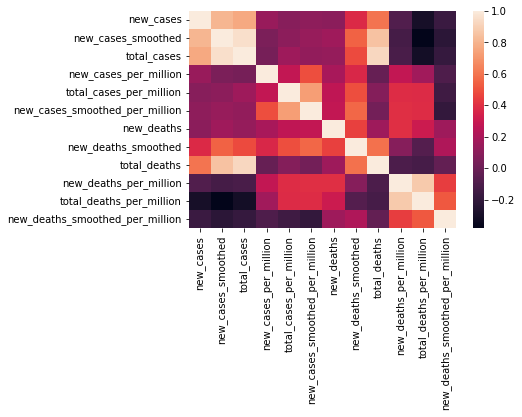

In [11]:
#Correlation plot
#Are the variables correlated to each other? 

corr = df.corr()
print(corr)
sns.heatmap(df.corr())
#corr.style.background_gradient(cmap='coolwarm')

In [12]:
#Any inconsistent, incomplete, duplicate or incorrect data? 
#Find the duplicates

df.duplicated().sum()
#0 implies no duplicate data

0

<AxesSubplot:xlabel='location', ylabel='new_cases'>

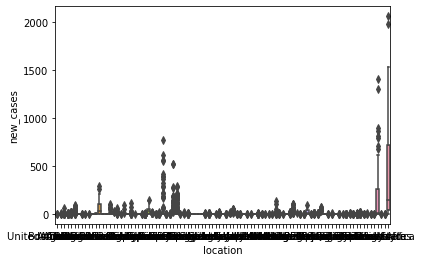

In [13]:
import seaborn as sns
sns.boxplot(x="location",y="new_cases",data=df)

Text(0.5, 1.0, 'new_deaths_smoothed_per_million')

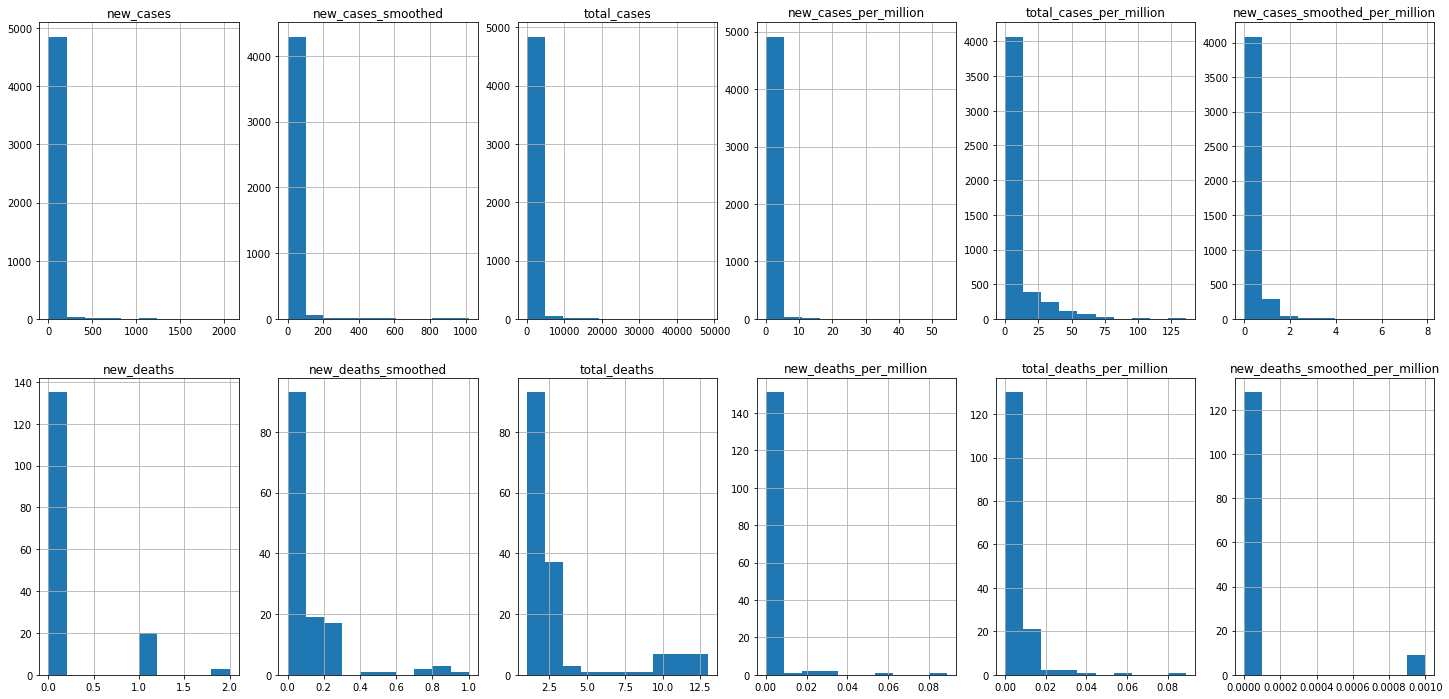

In [14]:
plt.figure(figsize=(25,12))
plt.subplot(2,6,1)
df['new_cases'].hist()
plt.title('new_cases')

plt.subplot(2,6,2)
df['new_cases_smoothed'].hist()
plt.title('new_cases_smoothed')

plt.subplot(2,6,3)
df['total_cases'].hist()
plt.title('total_cases')

plt.subplot(2,6,4)
df['new_cases_per_million'].hist()
plt.title('new_cases_per_million')

plt.subplot(2,6,5)
df['total_cases_per_million'].hist()
plt.title('total_cases_per_million')

plt.subplot(2,6,6)
df['new_cases_smoothed_per_million'].hist()
plt.title('new_cases_smoothed_per_million')

plt.subplot(2,6,7)
df['new_deaths'].hist()
plt.title('new_deaths')

plt.subplot(2,6,8)
df['new_deaths_smoothed'].hist()
plt.title('new_deaths_smoothed')

plt.subplot(2,6,9)
df['total_deaths'].hist()
plt.title('total_deaths')

plt.subplot(2,6,10)
df['new_deaths_per_million'].hist()
plt.title('new_deaths_per_million')

plt.subplot(2,6,11)
df['total_deaths_per_million'].hist()
plt.title('total_deaths_per_million')

plt.subplot(2,6,12)
df['new_deaths_smoothed_per_million'].hist()
plt.title('new_deaths_smoothed_per_million')


In [15]:
df['new_cases']=df['new_cases'].fillna(df['new_cases'].mean())
df['new_cases_smoothed']=df['new_cases_smoothed'].fillna(df['new_cases_smoothed'].median())
df['total_cases']=df['total_cases'].fillna(df['total_cases'].median())
df['new_cases_per_million']=df['new_cases_per_million'].fillna(df['new_cases_per_million'].median())
df['total_cases_per_million']=df['total_cases_per_million'].fillna(df['total_cases_per_million'].median())
df['new_cases_smoothed_per_million']=df['new_cases_smoothed_per_million'].fillna(df['new_cases_smoothed_per_million'].median())
df['new_deaths']=df['new_deaths'].fillna(df['new_deaths'].median())
df['new_deaths_smoothed']=df['new_deaths_smoothed'].fillna(df['new_deaths_smoothed'].median())
df['total_deaths']=df['total_deaths'].fillna(df['total_deaths'].median())
df['new_deaths_per_million']=df['new_deaths_per_million'].fillna(df['new_deaths_per_million'].median())
df['total_deaths_per_million']=df['total_deaths_per_million'].fillna(df['total_deaths_per_million'].median())
df['new_deaths_smoothed_per_million']=df['new_deaths_smoothed_per_million'].fillna(df['new_deaths_smoothed_per_million'].median())

In [16]:
df.isna().sum()

iso_code                           0
location                           0
date                               0
new_cases                          0
new_cases_smoothed                 0
total_cases                        0
new_cases_per_million              0
total_cases_per_million            0
new_cases_smoothed_per_million     0
new_deaths                         0
new_deaths_smoothed                0
total_deaths                       0
new_deaths_per_million             0
total_deaths_per_million           0
new_deaths_smoothed_per_million    0
dtype: int64

Mapping Countries with Continents

In [17]:
def get_continent_country(x):
    NorthAmerica = ['Barbados','Bermuda','Canada','Greenland','Jamaica','Mexico',
                     'Panama','Costa Rica','Dominican Republic','Guatemala',
                    'Puerto Rico','United States','Bahamas','Cuba','Honduras']
    SouthAmerica = ['Argentina','Bolivia','Brazil','Chile', 'Colombia','Ecuador',
                     'Peru','Uruguay','Venezuela','Guyana','Paraguay']
    Europe = ['Andorra','Austria','Belgium','Bosnia and Herzegovina','Bulgaria',
             'Croatia','Czechia','Denmark','Estonia', 'Finland', 'France','Georgia',
             'Germany','Greece', 'Hungary','Iceland','Ireland','Italy','Latvia',
              'Lithuania', 'Luxembourg', 'Malta','Moldova','Montenegro','Netherlands',
             'Norway','Poland','Portugal','Romania','Serbia','Slovakia','Slovenia',
             'Spain','Sweden','Switzerland','United Kingdom','Monaco']
    Africa = ['Benin','Cameroon','Central African Republic','Democratic Republic of Congo',
             'Ghana','Liberia','Morocco','Nigeria','South Africa','Sudan']
    Asia = ['Cyprus','India','Israel','Japan','Lebanon','Philippines','Qatar','Russia',
            'Saudi Arabia', 'Singapore','South Korea','Taiwan','Thailand', 'Turkey',
           'United Arab Emirates','Indonesia', 'Iran']
    Oceania = ['Australia','New Zealand','New Caledonia']
    
    if x in NorthAmerica:
        return "North America"
    elif x in SouthAmerica:
        return "South America"
    elif x in Europe:
        return "Europe"
    elif x in Africa:
        return "Africa"
    elif x in Asia:
        return "Asia"
    else:
        return "Oceania"

continent = []
for country in df['location']:
    y = get_continent_country(country)
    continent.append(y)
df['Continent'] = pd.Series(continent)

monkeypox_cont=df[['Continent','location','date','new_cases','new_cases_smoothed', 'total_cases',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths', 'new_deaths_smoothed',
       'total_deaths', 'new_deaths_per_million', 'total_deaths_per_million',
       'new_deaths_smoothed_per_million']].copy()

monkeypox_cont.head()


,Continent,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Europe,Andorra,2022-07-25,1.0,0.71,1.0,12.653,12.653,0.055,0.0,0.0,1.0,0.0,0.0015,0.0
1,Europe,Andorra,2022-07-26,2.0,0.71,3.0,25.306,37.958,0.055,0.0,0.0,1.0,0.0,0.0015,0.0
2,Europe,Andorra,2022-07-27,0.0,0.71,3.0,0.000,37.958,0.055,0.0,0.0,1.0,0.0,0.0015,0.0
3,Europe,Andorra,2022-07-28,0.0,0.71,3.0,0.000,37.958,0.055,0.0,0.0,1.0,0.0,0.0015,0.0
4,Europe,Andorra,2022-07-29,0.0,0.71,3.0,0.000,37.958,0.055,0.0,0.0,1.0,0.0,0.0015,0.0


Getting total cases by continent

In [18]:
total_cases_continent=monkeypox_cont.set_index('Continent').groupby(level=0)['new_cases'].agg(np.sum).sort_values(ascending=False)
print('TOTAL CASES BY CONTINENT')
print(total_cases_continent)
print("------------------------------")
total_cases_country=monkeypox_cont.set_index('location').groupby(level=0)['new_cases'].agg(np.sum).sort_values(ascending=False)[:15]
print('TOTAL CASES BY COUNTRY: TOP 20')
print(total_cases_country)

TOTAL CASES BY CONTINENT
Continent
Oceania          48336.000000
Europe           21791.000000
North America    19106.477787
South America     6544.000000
Africa             388.000000
Asia               308.000000
Name: new_cases, dtype: float64
------------------------------
TOTAL CASES BY COUNTRY: TOP 20
location
World             48227.0
United States     17336.0
Spain              6459.0
Brazil             4472.0
France             3402.0
Germany            3387.0
United Kingdom     3346.0
Peru               1300.0
Canada             1228.0
Netherlands        1138.0
Portugal            846.0
Italy               740.0
Belgium             671.0
Switzerland         436.0
Mexico              386.0
Name: new_cases, dtype: float64


In [19]:
#Top 3 countries in Oceania
Oceania=monkeypox_cont[monkeypox_cont['Continent'] == 'Oceania'].copy()
Oceania['new_cases_%'] = Oceania['new_cases']/np.sum(Oceania['new_cases'])
Oceania=Oceania.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:3]
print("Top 5 countries in Oceania")
print(Oceania)
print("------------------------------------")

#Top 5 countries in Europe
Europe=monkeypox_cont[monkeypox_cont['Continent'] == 'Europe'].copy()
Europe['new_cases_%'] = Europe['new_cases']/np.sum(Europe['new_cases'])
Europe=Europe.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:5]
print("Top 5 countries in Europe")
print(Europe)
print("------------------------------------")

#Top 5 countries in North America
NorthAmerica=monkeypox_cont[monkeypox_cont['Continent'] == 'North America'].copy()
NorthAmerica['new_cases_%'] = NorthAmerica['new_cases']/np.sum(NorthAmerica['new_cases'])
NorthAmerica=NorthAmerica.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:5]
print("Top 5 countries in North America")
print(NorthAmerica)
print("------------------------------------")

#Top 5 countries in South America
SouthAmerica=monkeypox_cont[monkeypox_cont['Continent'] == 'SouthAmerica'].copy()
SouthAmerica['new_cases_%'] = SouthAmerica['new_cases']/np.sum(SouthAmerica['new_cases'])
SouthAmerica=SouthAmerica.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:5]
print("Top 5 countries in South America")
print(SouthAmerica)
print("------------------------------------")

#Top 5 countries in Africa
Africa=monkeypox_cont[monkeypox_cont['Continent'] == 'Africa'].copy()
Africa['new_cases_%'] = Africa['new_cases']/np.sum(Africa['new_cases'])
Africa=Africa.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:5]
print("Top 5 countries in Africa")
print(Africa)
print("------------------------------------")

#Top 5 countries in Asia
Asia=monkeypox_cont[monkeypox_cont['Continent'] == 'Asia'].copy()
Asia['new_cases_%'] = Asia['new_cases']/np.sum(Asia['new_cases'])
Asia=Asia.set_index('location').groupby(level=0)['new_cases_%'].agg(np.sum).sort_values(ascending=False)[:5]
print("Top 5 countries in Asia")
print(Asia)
print("------------------------------------")











Top 5 countries in Oceania
location
World          0.997745
Australia      0.002131
New Zealand    0.000083
Name: new_cases_%, dtype: float64
------------------------------------
Top 5 countries in Europe
location
Spain             0.296407
France            0.156119
Germany           0.155431
United Kingdom    0.153550
Netherlands       0.052223
Name: new_cases_%, dtype: float64
------------------------------------
Top 5 countries in North America
location
United States    0.907336
Canada           0.064271
Mexico           0.020203
Puerto Rico      0.005077
Cuba             0.001072
Name: new_cases_%, dtype: float64
------------------------------------
Top 5 countries in South America
Series([], Name: new_cases_%, dtype: float64)
------------------------------------
Top 5 countries in Africa
location
Democratic Republic of Congo    0.420103
Nigeria                         0.404639
Ghana                           0.121134
South Africa                    0.012887
Cameroon              

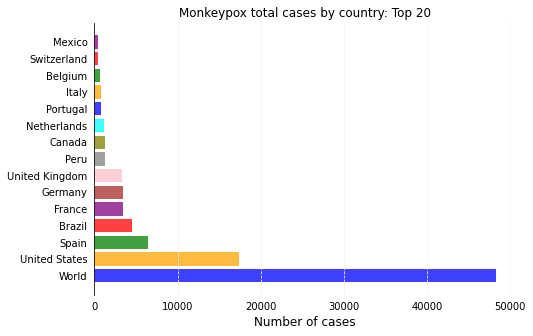

In [31]:
def cases_country():
    plt.figure(figsize=(9,5))
    plt.style.use('seaborn-colorblind')
    colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
    plt.barh(total_cases_country.index, total_cases_country, color=colors, alpha=0.75)
    ax = plt.gca()
    plt.subplots_adjust(left=0.25)
    ax.set_xlabel('Number of cases', fontsize = 12)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', color='0.95', ls='--')
    [t.set_visible(False) for t in ax.get_xticklines()]
    [t.set_visible(False) for t in ax.get_yticklines()]
    title = ax.set_title('Monkeypox total cases by country: Top 20')

cases_country()

In [32]:
#CALCULATING NUMBER OF DEATHS
monkeypox_cont['new_deaths']=monkeypox_cont['new_deaths'].fillna(0)

total_deaths_continent=monkeypox_cont.set_index('Continent').groupby(level=0)['new_deaths'].agg(np.sum).sort_values(ascending=False)
print('TOTAL DEATHS BY CONTINENT')
print(total_deaths_continent)
print('------------------------------')
total_deaths_country=monkeypox_cont.set_index('location').groupby(level=0)['new_deaths'].agg(np.sum).sort_values(ascending=False)[:7]
print('TOTAL DEATHS BY COUNTRY')
print(total_deaths_country)

#We make sure that we have the date in the correct format

monkeypox_cont['date']=pd.to_datetime(monkeypox_cont['date'])
monkeypox_cont['date']=monkeypox_cont['date'].dt.strftime('%Y/%m/%d')
mp_date=monkeypox_cont.sort_values('date').copy()

TOTAL DEATHS BY CONTINENT
Continent
Oceania          13.0
Africa            5.0
South America     3.0
Europe            2.0
North America     2.0
Asia              1.0
Name: new_deaths, dtype: float64
------------------------------
TOTAL DEATHS BY COUNTRY
location
World      13.0
Nigeria     4.0
Spain       2.0
Peru        1.0
Mexico      1.0
Cuba        1.0
Ghana       1.0
Name: new_deaths, dtype: float64


In [33]:
#Sorting the data only by date with "sum" being the cumulative number of cases per day in the world

new_cases_date=mp_date.set_index('date').groupby(level=0)['new_cases'].agg({np.sum,np.average})
new_cases_date.head()

,sum,average
date,,
2022/05/06,2.0,1.000000
2022/05/07,0.0,0.000000
2022/05/08,20.0,6.666667
2022/05/09,0.0,0.000000
2022/05/10,0.0,0.000000


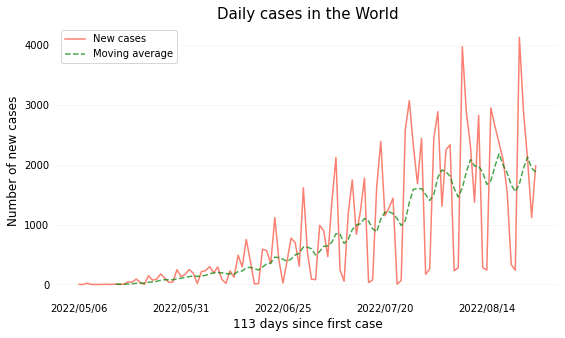

In [34]:
#Graph daily cases of monkeypox in the world
def cases_world():
    daily_cases = new_cases_date.copy()
    #We calculate the moving average to observe the smoothed trend in the daily cases
    daily_cases['Moving_average'] = daily_cases['sum'].rolling(window = 10).mean()
    
    plt.figure(figsize=(9,5))
    plt.style.use('seaborn-colorblind')
    plt.plot(daily_cases['sum'], label='New cases', color='salmon')
    plt.plot(daily_cases['Moving_average'], '--', label='Moving average', color='g', alpha=0.7)
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(daily_cases.shape[0]/20))
    ax.set_xlabel('113 days since first case', fontsize = 12)
    ax.set_ylabel('Number of new cases', fontsize = 12)
    title = ax.set_title("\n".join(wrap('Daily cases in the World',85)),fontsize=15)
    ax.grid(axis='y', color='0.95', ls='--')
    [s.set_visible(False) for s in ax.spines.values()]
    [t.set_visible(False) for t in ax.get_xticklines()]
    [t.set_visible(False) for t in ax.get_yticklines()]
    return plt.show()
cases_world()

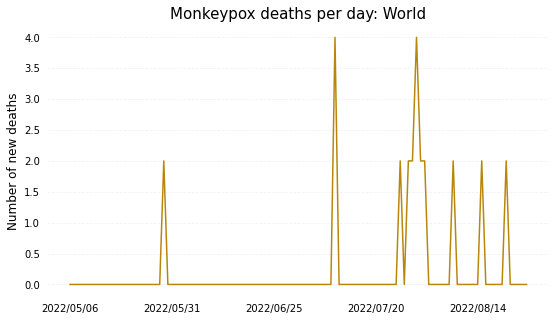

In [35]:
#Monkeypox deaths worldwide
def deaths_world():
    new_deaths_date=mp_date.set_index('date').groupby(level=0)['new_deaths'].agg(np.sum).copy()
    
    plt.figure(figsize=(9,5))
    plt.style.use('seaborn-colorblind')
    plt.plot(new_deaths_date, c='darkgoldenrod', label='New_deaths')
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/20))
    ax.set_ylabel('Number of new deaths', fontsize = 12)
    title = ax.set_title("\n".join(wrap('Monkeypox deaths per day: World',85)),fontsize=15)
    ax.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax.spines.values()]
    [t.set_visible(False) for t in ax.get_xticklines()]
    [t.set_visible(False) for t in ax.get_yticklines()]
    return plt.show()
deaths_world()

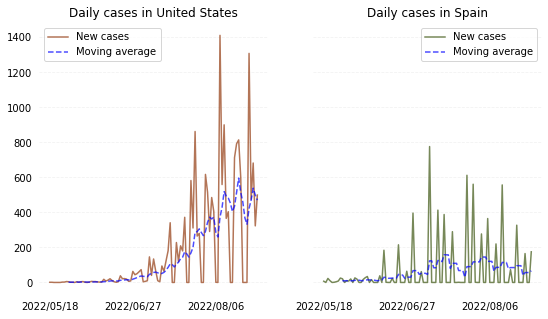

In [36]:
def cases_eua_spain():
    EUA = mp_date[mp_date['location'] == 'United States'].copy()
    EUA = EUA.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    EUA = pd.DataFrame(EUA)
    EUA['Moving_average'] = EUA['new_cases'].rolling(window = 10).mean()
    Spain = mp_date[mp_date['location'] == 'Spain'].copy()
    Spain = Spain.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    Spain = pd.DataFrame(Spain)
    Spain['Moving_average'] = Spain['new_cases'].rolling(window = 10).mean()
    
    fig, ((ax1,ax2))= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(9, 5))    
    ax1.plot(EUA['new_cases'], c='sienna', label='New cases', alpha=0.8)
    ax1.plot(EUA['Moving_average'],'--', label='Moving average', color='b', alpha=0.7 )
    ax2.plot(Spain['new_cases'], c='darkolivegreen', label='New cases', alpha=0.8)
    ax2.plot(Spain['Moving_average'], '--', label='Moving average', color='b', alpha=0.7)
    ax = plt.gca()
    ax1.legend()
    ax2.legend()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax1.set_title('Daily cases in United States')
    ax1.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax1.spines.values()]
    [t.set_visible(False) for t in ax1.get_xticklines()]
    [t.set_visible(False) for t in ax1.get_yticklines()]
    ax2.set_title('Daily cases in Spain')
    ax2.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax2.spines.values()]
    [t.set_visible(False) for t in ax2.get_xticklines()]
    [t.set_visible(False) for t in ax2.get_yticklines()]
    return plt.show()
cases_eua_spain()

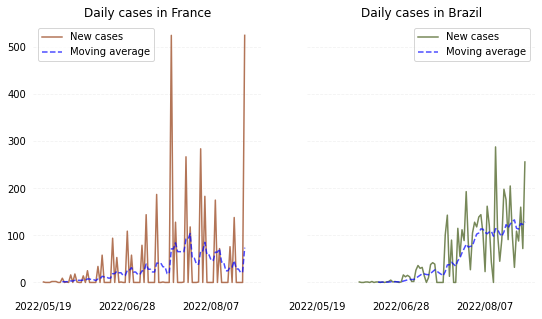

In [37]:
def cases_france_brazil():
    France = mp_date[mp_date['location'] == 'France'].copy()
    France = France.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    France = pd.DataFrame(France)
    France['Moving_average'] = France['new_cases'].rolling(window = 10).mean()
    Brazil = mp_date[mp_date['location'] == 'Brazil'].copy()
    Brazil = Brazil.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    Brazil = pd.DataFrame(Brazil)
    Brazil['Moving_average'] = Brazil['new_cases'].rolling(window = 10).mean()
    
    fig, ((ax1,ax2))= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(9, 5))    
    ax1.plot(France['new_cases'], c='sienna', label='New cases', alpha=0.8)
    ax1.plot(France['Moving_average'],'--', label='Moving average', color='b', alpha=0.7 )
    ax2.plot(Brazil['new_cases'], c='darkolivegreen', label='New cases', alpha=0.8)
    ax2.plot(Brazil['Moving_average'],'--', label='Moving average', color='b', alpha=0.7 )
    ax = plt.gca()
    ax1.legend()
    ax2.legend()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax1.set_title('Daily cases in France')
    ax1.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax1.spines.values()]
    [t.set_visible(False) for t in ax1.get_xticklines()]
    [t.set_visible(False) for t in ax1.get_yticklines()]
    ax2.set_title('Daily cases in Brazil')
    ax2.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax2.spines.values()]
    [t.set_visible(False) for t in ax2.get_xticklines()]
    [t.set_visible(False) for t in ax2.get_yticklines()]
    return plt.show()
cases_france_brazil()    


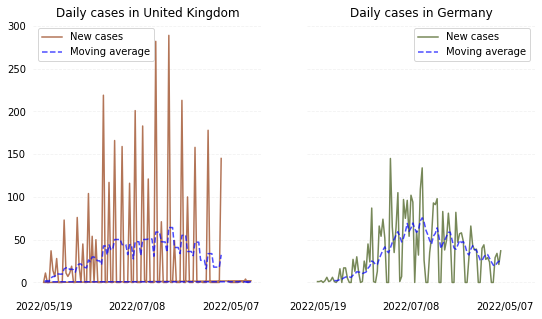

In [38]:
def cases_ger_uk():
    Germany = mp_date[mp_date['location'] == 'Germany'].copy()
    Germany = Germany.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    Germany = pd.DataFrame(Germany)
    Germany['Moving_average'] = Germany['new_cases'].rolling(window = 10).mean()
    UK = mp_date[mp_date['location'] == 'United Kingdom'].copy()
    UK = UK.set_index('date').groupby(level=0)['new_cases'].agg(np.sum)
    UK = pd.DataFrame(UK)
    UK['Moving_average'] = UK['new_cases'].rolling(window = 10).mean()
    
    fig, ((ax1,ax2))= plt.subplots(1, 2, sharey=True,sharex=True,figsize=(9, 5))    
    ax2.plot(Germany['new_cases'], c='darkolivegreen', label='New cases', alpha=0.8)
    ax2.plot(Germany['Moving_average'],'--', label='Moving average', color='b', alpha=0.7 )
    ax1.plot(UK['new_cases'], c='sienna', label='New cases', alpha=0.8)
    ax1.plot(UK['Moving_average'],'--', label='Moving average', color='b', alpha=0.7 )
    ax = plt.gca()
    ax1.legend()
    ax2.legend()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(new_cases_date.shape[0]/30))
    ax2.set_title('Daily cases in Germany')
    ax1.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax1.spines.values()]
    [t.set_visible(False) for t in ax1.get_xticklines()]
    [t.set_visible(False) for t in ax1.get_yticklines()]
    ax1.set_title('Daily cases in United Kingdom')
    ax2.grid(axis='y',color='0.95', ls='--')
    [s.set_visible(False) for s in ax2.spines.values()]
    [t.set_visible(False) for t in ax2.get_xticklines()]
    [t.set_visible(False) for t in ax2.get_yticklines()]
    return plt.show()
cases_ger_uk()

##AUTOREGRESSIVE FORECASTING

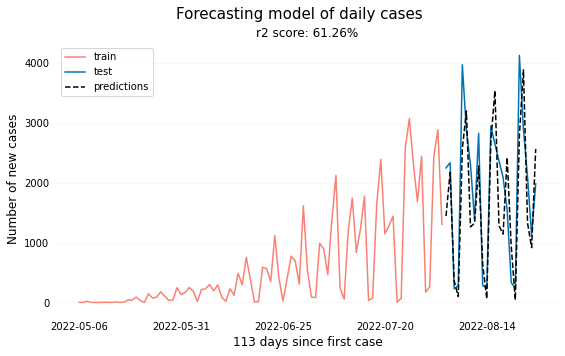

In [39]:
def cases_world_forecasting():
    cases_d = new_cases_date.copy()
    cases_d = cases_d[['sum','average']].fillna(0)
    cases_d.index = pd.to_datetime(cases_d.index)
    cases_d.index = cases_d.index.to_period('D')

    #model
    n = len(cases_d)
    ntrain = int(n*0.8) #80% of data for training
    ntest = n - ntrain  #20% of data for test
    lag = 9
    res = AutoReg(cases_d['sum'][:ntrain], lags = lag).fit()
    
    preds = res.model.predict(res.params, start=n-ntest, end=n)
    
    predictions = pd.Series(preds, index=cases_d.index[-ntest:])
    score = r2_score(cases_d['sum'][-ntest:], preds[:-1])*100
    
    cases_d.index = cases_d.index.astype(str)
    predictions.index = predictions.index.astype(str)

    plt.figure(figsize=(9,5))
    plt.plot(cases_d['sum'][:ntrain], label='train', color='salmon')
    plt.plot(cases_d['sum'][-ntest:], label='test')
    plt.plot(predictions, '--', label='predictions', color='k')
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(cases_d.shape[0]/20))
    ax.set_xlabel('113 days since first case', fontsize = 12)
    ax.set_ylabel('Number of new cases', fontsize = 12)
    plt.suptitle("\n".join(wrap('Forecasting model of daily cases',85)),fontsize=15)
    plt.title("r2 score:" + " {:.2f}".format(score) +"%")
    ax.grid(axis='y', color='0.95', ls='--')
    [s.set_visible(False) for s in ax.spines.values()]
    [t.set_visible(False) for t in ax.get_xticklines()]
    [t.set_visible(False) for t in ax.get_yticklines()]
    plt.legend()    
    
    return 
cases_world_forecasting()


This model performs better when trained with a larger amount of data. In this case we only have 80% of 113 days so it is not very accurate, it is convenient to wait to receive more data to improve the model and see if it works in predicting future values.

To check the above, below is an example of a lower performance when decreasing the amount of training data.

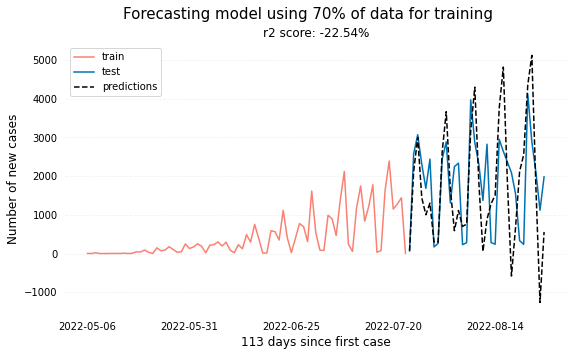

In [42]:
def test_forecasting():
    cases_d = new_cases_date.copy()
    cases_d = cases_d[['sum','average']].fillna(0)
    cases_d.index = pd.to_datetime(cases_d.index)
    cases_d.index = cases_d.index.to_period('D')
    
    #model
    n = len(cases_d)
    ntrain = int(n*0.70) #70% of data for training
    ntest = n - ntrain   #30$ of data for test
    lag = 9
    res = AutoReg(cases_d['sum'][:ntrain], lags = lag).fit()
    
    preds = res.model.predict(res.params, start=n-ntest, end=n)
    
    predictions = pd.Series(preds, index=cases_d.index[-ntest:])
    score = r2_score(cases_d['sum'][-ntest:], preds[:-1])*100
    
    cases_d.index = cases_d.index.astype(str)
    predictions.index = predictions.index.astype(str)
    
    plt.figure(figsize=(9,5))
    plt.plot(cases_d['sum'][:ntrain], label='train', color='salmon')
    plt.plot(cases_d['sum'][-ntest:], label='test')
    plt.plot(predictions, '--', label='predictions', color='k')
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(cases_d.shape[0]/20))
    ax.set_xlabel('113 days since first case', fontsize = 12)
    ax.set_ylabel('Number of new cases', fontsize = 12)
    plt.suptitle("\n".join(wrap('Forecasting model using 70% of data for training',85)),fontsize=15)
    plt.title("r2 score:" + " {:.2f}".format(score) +"%")
    ax.grid(axis='y', color='0.95', ls='--')
    [s.set_visible(False) for s in ax.spines.values()]
    [t.set_visible(False) for t in ax.get_xticklines()]
    [t.set_visible(False) for t in ax.get_yticklines()]
    plt.legend()    
    
    return 
test_forecasting()

# ANALYSIS